<a href="https://colab.research.google.com/github/Ady-92/task-on-student-performance-based-on-studied-hours.ipynb/blob/main/Task_on_student_performance_based_on_studied_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task: predicting the percentage scores based on studied hours.

In [3]:
#libraries to be imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#reading the dataset through url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dt = pd.read_csv(url)
dt.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#printing the last elements of the table
dt.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#Cleaning the data
dt.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#describing the data
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


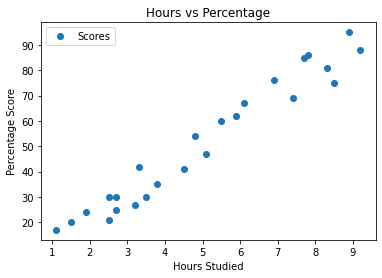

In [9]:
# plot of hours and percentage score
dt.plot(x='Hours',y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
#Checking for correlation
correl= dt.corr()
correl

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


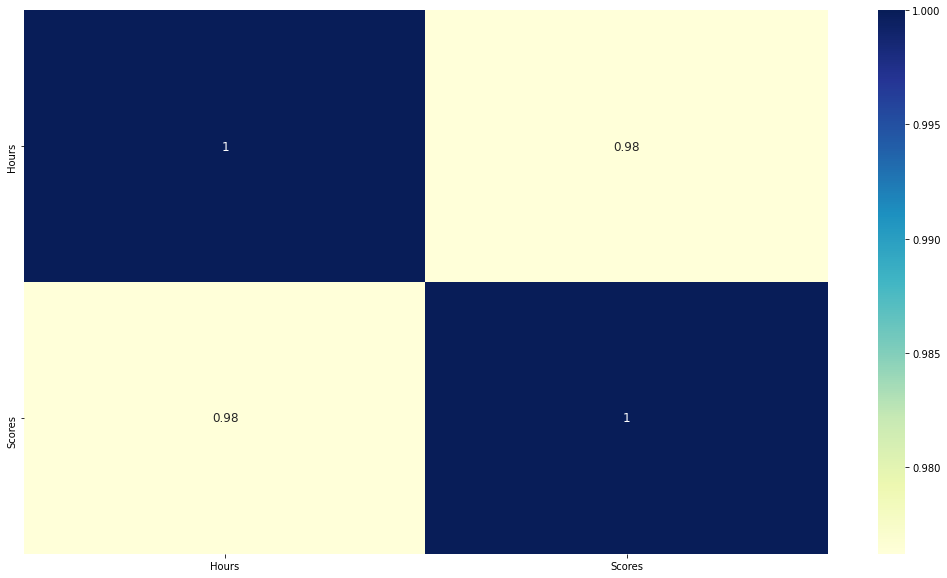

In [11]:
#plotting correlation for better visualization
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(correl, cmap='YlGnBu', annot= True, annot_kws={'size':12})

In [13]:
# saparating dataset into x and y
X= dt.drop('Scores', axis=1)
Y=dt['Scores']


In [25]:
# Now using Ridge estimator
from sklearn.linear_model import Ridge
np.random.seed(42)

#split the data into train and test sets
X_trai, X_test, Y_train, Y_test = train_test_split(X, Y,test_size =0.2)

model =Ridge()
model.fit(X_trai,Y_train)  
model.score(X_test,Y_test)                                              

0.9669930313719547

In [26]:
# predicting scores based on studied hours
Y_preds = model.predict(X_test)
Y_preds

array([82.93187149, 27.22083716, 27.22083716, 69.48438045, 59.8790297 ])

In [27]:
# putting into the data frame for better understanding
dtt = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_preds})
print(dtt)

    Actual  Predicted
8       81  82.931871
16      30  27.220837
0       21  27.220837
23      76  69.484380
11      62  59.879030


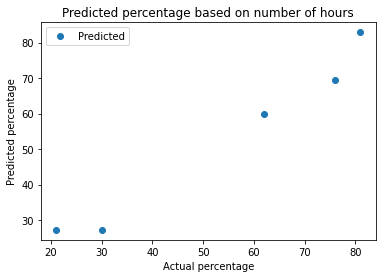

In [28]:
#graph plot of actual and predicted
dtt.plot(x='Actual', y='Predicted', style='o')
plt.title('Predicted percentage based on number of hours')
plt.xlabel('Actual percentage',)
plt.ylabel('Predicted percentage')
plt.show()

In [29]:
#Predicting the wanted_score for studied hours: '9.25 hour'

hour = np.array(9.25).reshape(1,-1)
wanted_score= model.predict(hour)
print('hours', np.asscalar(hour))
print('predicted_wanted_score',np.asscalar(wanted_score))

hours 9.25
predicted_wanted_score 92.05695470250737


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [30]:
#Model evaluation

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_preds)))

Mean Absolute Error: 3.9136922686784787
Mean Squared Error: 19.421300340741833
Root Mean Squared Error: 4.406960442384505


In [ ]:
#Conclusion
#The value of the root mean squared error is 4.40, which is 
#less than 10% of the mean value of the percentages of all the students (51.48.)
#meaning that our algorithm performed well.